In [23]:
import pandas as pd
pd.__version__

'0.25.1'

In [1]:
#数据导入部分
import pandas as pd
gl = pd.read_csv('game_logs.csv')
gl.head()

/Users/binyi/anaconda3/envs/binyi_py/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [ ]:
date - 比赛时间
v_name - 客队名
v_league - 客队联盟
h_name - 主队名
h_league - 主队联盟
v_score - 客队得分
h_score - 主队得分
v_line_score - 客队每局得分排列，例如： 010000(10)00.
h_line_score - 主队每局得分排列，例如： 010000(10)0X.
park_id - 比赛举办的球场名
attendance- 比赛观众

In [2]:
#使用pandas提供的.info()方法，数据类型信息，内存使用情况
gl.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 861.6 MB


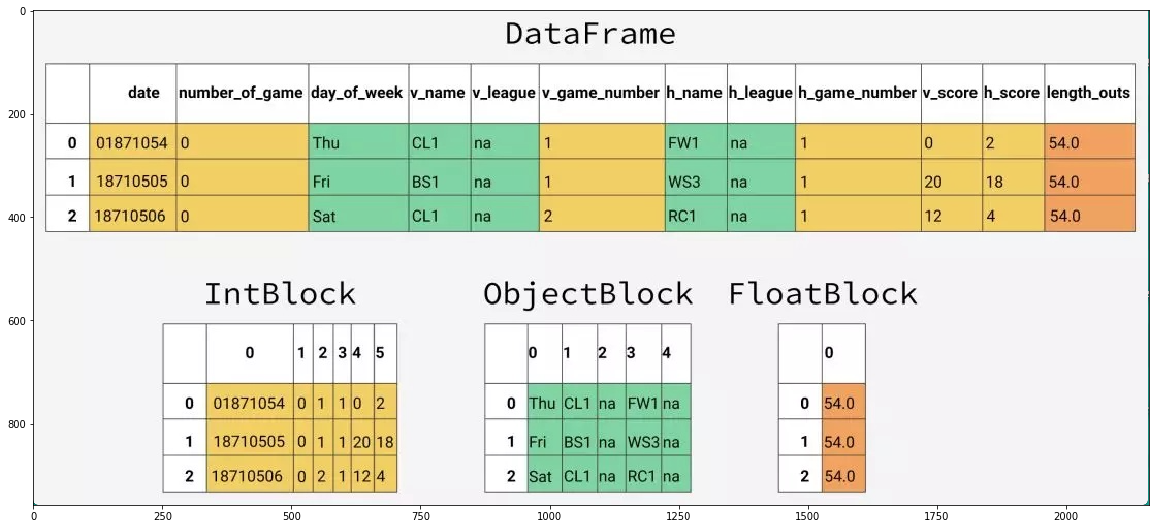

In [11]:
#在 pandas 内部，同样数据类型的列会组织成同一个值块（blocks of values）
#这里是前12列的特征
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,20)
png = mpimg.imread('p1.png')
plt.imshow(png)

In [ ]:
以看到这些块并没有保留原有的列名称。这是因为这些块为存储 dataframe 中的实际值进行了优化。
pandas 的 BlockManager 类则负责保留行列索引与实际块之间的映射关系。它可以作为一个 API 
使用，提供了对底层数据的访问。不管我们何时选择、编辑或删除这些值，dataframe 类和 BlockManager 
类的接口都会将我们的请求翻译成函数和方法的调用。
在 pandas.core.internals 模块中，每一种类型都有一个专门的类。pandas 使用 ObjectBlock 类来表示包含字符串列的块，
用 FloatBlock 类表示包含浮点数列的块。对于表示整型数和浮点数这些数值的块，pandas 会将这些列组合起来，存储成 NumPy ndarray。
NumPy ndarray 是围绕 C 语言的数组构建的，其中的值存储在内存的连续块中。这种存储方案使得对值的访问速度非常快。


In [12]:
#因为每种数据类型都是分开存储的，所以我们将检查不同数据类型的内存使用情况。首先，我们先来看看各个数据类型的平均内存用量。
#通过select_dtypes()方法来选取固定类型
for dtype in ['float','int','object']:
    selected_dtype = gl.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 1.29 MB
Average memory usage for int columns: 1.12 MB
Average memory usage for object columns: 9.53 MB


In [ ]:
pandas 内部将数值表示为 NumPy ndarrays，并将它们存储在内存的连续块中。这种存储模式占用的空间更少，
而且也让我们可以快速访问这些值。因为 pandas 表示同一类型的每个值时都使用同样的字节数，而 NumPy ndarray 
可以存储值的数量，所以 pandas 可以快速准确地返回一个数值列所消耗的字节数。

pandas 中的许多类型都有多个子类型，这些子类型可以使用更少的字节来表示每个值。比如说 float 类型就包含 
float16、float32 和 float64 子类型。类型名称中的数字就代表该类型表示值的位（bit）数。比如说，我们
刚刚列出的子类型就分别使用了 2、4、8、16 个字节

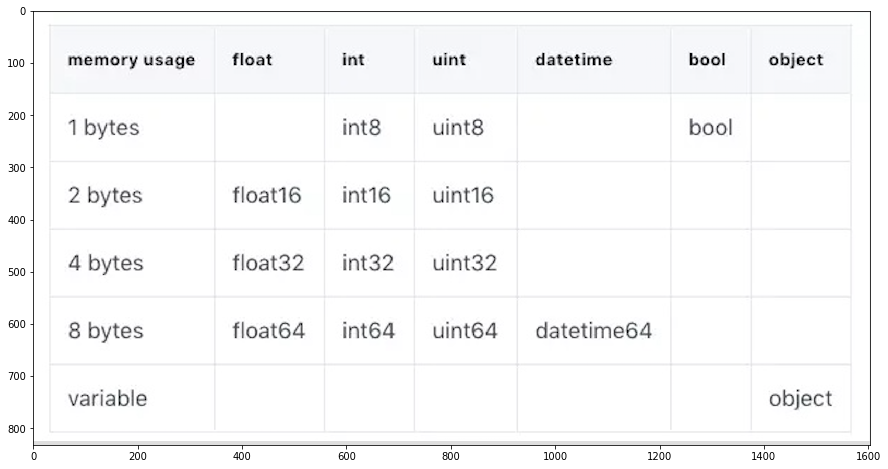

In [28]:
#pandas数据类型中的所有数据的子类型
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,15)
png = mpimg.imread('p2.png')
plt.imshow(png)

In [15]:
#使用 numpy.iinfo 类来验证每个整型数子类型的最大值和最小值
import numpy as np
int_types = ["uint8", "int8", "int16"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [ ]:
优化方法一：子类型优化数值列
使用函数 pd.to_numeric() 来对数值类型（使用 DataFrame.select_dtypes 来选择整型列）进行 downcast（向下转型）操作


In [ ]:
针对int型

In [16]:
#select_dtypes()函数选定特定类型（e.g. int）
#棒球比赛中的得分等都是无符号整型
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

gl_int = gl.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(gl_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

7.87 MB
1.48 MB


,before,after
uint8,NaN,5.0
uint32,NaN,1.0
int64,6.0,NaN


In [ ]:
以看到内存用量从 7.9 MB 下降到了 1.5 MB，降低了 80% 以上

In [ ]:
针对float型

In [17]:
gl_float = gl.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(gl_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

100.99 MB
50.49 MB


,before,after
float32,NaN,77.0
float64,77.0,NaN


In [ ]:
可以看到浮点型列的数据类型从 float64 变成了 float32，让内存用量降低了 50%

In [ ]:
重新看整体的内存用量

In [18]:
optimized_gl = gl.copy()

optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float

print(mem_usage(gl))
print(mem_usage(optimized_gl))

861.57 MB
804.69 MB


In [ ]:
数值存储与字符串存储的比较：

object 类型表示使用 Python 字符串对象的值，部分原因是 NumPy 不支持缺失（missing）字符串类型。因为 Python 
是一种高级的解释性语言，它对内存中存储的值没有细粒度的控制能力。

这一限制导致字符串的存储方式很碎片化，从而会消耗更多内存，而且访问速度也更慢。object 列中的每个元素实际上都是一
个指针，包含了实际值在内存中的位置的「地址」。

下面这幅图给出了以 NumPy 数据类型存储数值数据和使用 Python 内置类型存储字符串数据的方式

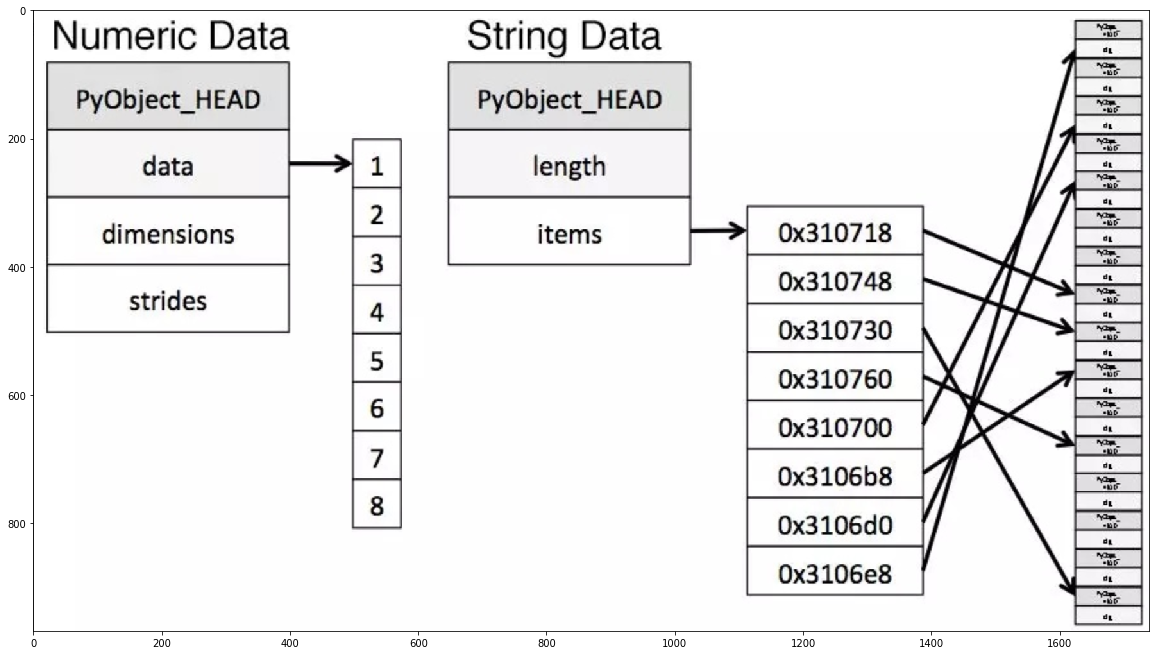

In [19]:
#pandas中object数据类型
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,20)
png = mpimg.imread('p3.png')
plt.imshow(png)

In [20]:
#python中字符串的存储
from sys import getsizeof

s1 = 'working out'
s2 = 'memory usage for'
s3 = 'strings in python is fun!'
s4 = 'strings in python is fun!'

for s in [s1, s2, s3, s4]:
    print(getsizeof(s))

60
65
74
74


In [21]:
#pandas的字符传存储
obj_series = pd.Series(['working out',
                          'memory usage for',
                          'strings in python is fun!',
                          'strings in python is fun!'])
obj_series.apply(getsizeof)

0    60
1    65
2    74
3    74
dtype: int64

In [ ]:
使用 Categoricals 优化 object 类型:
pandas 在 0.15 版引入了 Categorials。category 类型在底层使用了整型值来表示一个列中的值，
而不是使用原始值。pandas 使用一个单独的映射词典将这些整型值映射到原始值。只要当一个列包含有
限的值的集合时，这种方法就很有用。当我们将一列转换成 category dtype 时，pandas 就使用最
节省空间的 int 子类型来表示该列中的所有不同值

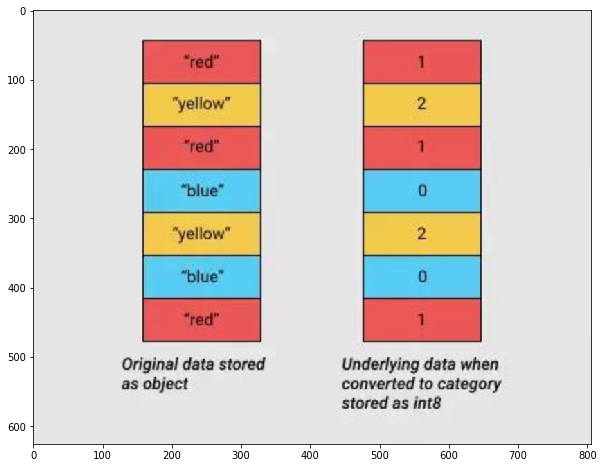

In [27]:
#pandas中object和categoricals的差距
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
png = mpimg.imread('p4.png')
plt.imshow(png)

In [24]:
gl_obj = gl.select_dtypes(include=['object']).copy()
gl_obj.describe()

,day_of_week,v_name,v_league,h_name,h_league,day_night,completion,forefeit,protest,park_id,...,h_player_6_id,h_player_6_name,h_player_7_id,h_player_7_name,h_player_8_id,h_player_8_name,h_player_9_id,h_player_9_name,additional_info,acquisition_info
count,171907,171907,171907,171907,171907,140150,116,145,180,171907,...,140838,140838,140838,140838,140838,140838,140838,140838,1456,140841
unique,7,148,7,148,7,2,116,3,5,245,...,4774,4720,5253,5197,4760,4710,5193,5142,332,1
top,Sat,CHN,NL,CHN,NL,D,"19890429,ARL01,6,6,59",H,V,STL07,...,grimc101,Charlie Grimm,grimc101,Charlie Grimm,lopea102,Al Lopez,spahw101,Warren Spahn,HTBF,Y
freq,28891,8870,88866,9024,88867,82724,1,69,90,7022,...,427,427,491,491,676,676,339,339,1112,140841


In [30]:
#对于week列进行string转换categorical
#使用astype()
dow = gl_obj.day_of_week
print(dow.head())

dow_cat = dow.astype('category')
print(dow_cat.head())

0    Thu
1    Fri
2    Sat
3    Mon
4    Tue
Name: day_of_week, dtype: object
0    Thu
1    Fri
2    Sat
3    Mon
4    Tue
Name: day_of_week, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]


In [31]:
#使用了 Series.cat.codes 属性来返回 category 类型用来表示每个值的整型值
dow_cat.head().cat.codes

0    4
1    0
2    2
3    1
4    5
dtype: int8

In [32]:
#转换使用量对比
#9.8 MB 的内存用量减少到了 0.16 MB，减少了 98%
print(mem_usage(dow))
print(mem_usage(dow_cat))

9.84 MB
0.16 MB


In [ ]:
主要将 category 类型用于不同值的数量少于值的总数量的 50% 的 object 列。
如果一列中的所有值都是不同的，那么 category 类型所使用的内存将会更多。因为
这一列不仅要存储所有的原始字符串值，还要额外存储它们的整型值代码

In [33]:
converted_obj = pd.DataFrame()

for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

In [ ]:
对比string对象的转换前后

In [34]:
print(mem_usage(gl_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([gl_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

752.72 MB
51.67 MB


,before,after
object,78.0,NaN
category,NaN,2.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
...,...,...
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0


In [35]:
optimized_gl[converted_obj.columns] = converted_obj

mem_usage(optimized_gl)

'103.64 MB'

In [37]:
#datetime的优化，string转datetime
date = optimized_gl.date
print(mem_usage(date))
date.head()
optimized_gl['date'] = pd.to_datetime(date,format='%Y%m%d')

print(mem_usage(optimized_gl))

0.66 MB
104.29 MB


In [38]:
optimized_gl.date.head()

0   1871-05-04
1   1871-05-05
2   1871-05-06
3   1871-05-08
4   1871-05-09
Name: date, dtype: datetime64[ns]

In [ ]:
所以在导入数据中读入数据的时候，最好的方式是指定类型

In [39]:
#打印一下字典
dtypes = optimized_gl.drop('date',axis=1).dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

# rather than print all 161 items, we'll
# sample 10 key/value pairs from the dict
# and print it nicely using prettyprint

preview = first2pairs = {key:value for key,value in list(column_types.items())[:10]}
import pprint
pp = pp = pprint.PrettyPrinter(indent=4)
pp.pprint(preview)

{   'day_of_week': 'category',
    'h_game_number': 'uint8',
    'h_league': 'category',
    'h_name': 'category',
    'h_score': 'uint8',
    'number_of_game': 'uint8',
    'v_game_number': 'uint8',
    'v_league': 'category',
    'v_name': 'category',
    'v_score': 'uint8'}


In [40]:
read_and_optimized = pd.read_csv('game_logs.csv',dtype=column_types,parse_dates=['date'],infer_datetime_format=True)

print(mem_usage(read_and_optimized))
read_and_optimized.head()

104.28 MB


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,1871-05-04,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,1871-05-05,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,1871-05-06,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,1871-05-08,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,1871-05-09,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [ ]:
总结：
1. pd.read_csv(dtype = {列名：类型}，parse_dates=['列名'])读入数据时使用参数dtype传入字典，对于时间数据直接使用parse_dates处理
2. 使用pd.select_dtypes(include=[dtype])对于固定类型的数据进行处理
3. 使用pd.info(memory_usage='deep')查看数据具体内存使用情况
4. pd_numeric.apply(pd.to_numeric,downcast='unsigned')，pd.to_numeric() 来对数值类型（使用 DataFrame.select_dtypes 
来选择需要的数据）进行 downcast（向下转型）操作
5. object_pd.astype('category'),对于字符串分类数占总数比小于50%的object对象，使用category代替object
6. object_pd.to_datetime(date,format='%Y%m%d'), 对于天数的字符串，使用datetime来代替。

时间 or 空间